In [1]:
from sympy import symbols, Matrix, pprint, collect, factor
import itertools
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
# import basic plot tools
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

x1, x2, x3, x4 = symbols('x1, x2, x3, x4')
x = []
name = "x"
for i in range(1,5):
    v = symbols(name+str(i))
    x.append(v)

MA1 = Matrix([[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])
MA2 = Matrix([[0, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 0],[0, 0, 0, 0]])
MA3 = Matrix([[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])
MA4 = Matrix([[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])

def matrices(A1,A2,A3,A4):
    MatrixAA1 = {}
    for i in range(4):
        for j in range(4):
            if (i == 0):
                MatrixAA1[i,j] = A1[i+j]
            if (i == 1):
                 MatrixAA1[i,j] = A1[3+i+j]
            if (i == 2):
                 MatrixAA1[i,j] = A1[6+i+j]
            if (i == 3):
                MatrixAA1[i,j] = A1[9+i+j]
    MatrixAA2 = {}
    for i in range(4):
        for j in range(4):
            if (i == 0):
                MatrixAA2[i,j] = A2[i+j]
            if (i == 1):
                 MatrixAA2[i,j] = A2[3+i+j]
            if (i == 2):
                 MatrixAA2[i,j] = A2[6+i+j]
            if (i == 3):
                MatrixAA2[i,j] = A2[9+i+j]
    MatrixAA3 = {}
    for i in range(4):
        for j in range(4):
            if (i == 0):
                MatrixAA3[i,j] = A3[i+j]
            if (i == 1):
                 MatrixAA3[i,j] = A3[3+i+j]
            if (i == 2):
                 MatrixAA3[i,j] = A3[6+i+j]
            if (i == 3):
                MatrixAA3[i,j] = A3[9+i+j]
    MatrixAA4 = {}
    for i in range(4):
        for j in range(4):
            if (i == 0):
                MatrixAA4[i,j] = A4[i+j]
            if (i == 1):
                MatrixAA4[i,j] = A4[3+i+j]
            if (i == 2):
                MatrixAA4[i,j] = A4[6+i+j]
            if (i == 3):
                MatrixAA4[i,j] = A4[9+i+j]
    MMT = [MatrixAA1,MatrixAA2,MatrixAA3,MatrixAA4]
    return(MMT)
def Selecting(X):
    x1, x2, x3, x4 = symbols('x1, x2, x3, x4')
    X1 = []
    for i in range(len(X)):
        if (X[i] != 0):
            X1.append(X[i])
    return(X1)
def Equations(First):
    BB31= First
    Pl1 =[]
    for i in range(len(BB31)):
        Pl1.append(dict(BB31[i].as_coefficients_dict()))
        #print(BB31)
    ##Symplify computations of coefficients module 2
    EQ1 =[]
    for l in range(len(Pl1)):
        for s in Pl1[l]:
            if (Pl1[l][s] % 2) == 0:
                Pl1[l][s] = 0
            else:
                Pl1[l][s] = 1               
        EQ1.append(sum([key * val for key, val in Pl1[l].items()]))
    #print(EQ1)
    #print(len(EQ1))
    ##Selecting the equations we need
    EQ3=[]
    for l in range(len(EQ1)):
        if (EQ1[l] != 0) and (EQ1[l]!=1):
            EQ3.append(EQ1[l])
    #print(EQ3) 
    #print(len(EQ3))
    return(EQ3)

# Right Nuclei

In [2]:
def functionNr1(A):
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    for i in range(len(A)):
        for j in range(len(A)):
            for s in range(len(A)):
                for m in range(len(A)):
                    for k in range(len(A)):
                        s1.append(A[i][k,j]*A[k][s,m]- A[j][k,m]*A[i][s,k])                                  
                    l1 = sum(s1)
                    s2.append(l1*x[m])
                    l2 = sum(s2)
                s3.append(l2)
    return(s3)
RN = Equations(Selecting(functionNr1(matrices(MA1,MA2,MA3,MA4))))
print(RN)

[x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4]


In [6]:
qregrn1 = QuantumRegister(4) 
cregrn1 = ClassicalRegister(4) 
ancillaryrn1 = QuantumRegister(2)


qcrn1 = QuantumCircuit(qregrn1, ancillaryrn1, cregrn1)

qcrn1.h(range(4))

qcrn1.barrier(qregrn1)


qcrn1.cx(qregrn1[0],ancillaryrn1[0])
qcrn1.cx(qregrn1[1],ancillaryrn1[0])
#######################################
qcrn1.barrier(qregrn1)
###########################################

qcrn1.cx(qregrn1[2],ancillaryrn1[1])
qcrn1.cx(qregrn1[3],ancillaryrn1[1])
#######################################
qcrn1.barrier(qregrn1)
###########################################
qcrn1.h(range(4))

for k in range(4):
    qcrn1.measure(qregrn1[k],cregrn1[k])

qcrn1.draw()

┌───┐ ░            ░            ░ ┌───┐┌─┐         
q6_0: ┤ H ├─░───■────────░────────────░─┤ H ├┤M├─────────
      ├───┤ ░   │        ░            ░ ├───┤└╥┘┌─┐      
q6_1: ┤ H ├─░───┼────■───░────────────░─┤ H ├─╫─┤M├──────
      ├───┤ ░   │    │   ░            ░ ├───┤ ║ └╥┘┌─┐   
q6_2: ┤ H ├─░───┼────┼───░───■────────░─┤ H ├─╫──╫─┤M├───
      ├───┤ ░   │    │   ░   │        ░ ├───┤ ║  ║ └╥┘┌─┐
q6_3: ┤ H ├─░───┼────┼───░───┼────■───░─┤ H ├─╫──╫──╫─┤M├
      └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░ └───┘ ║  ║  ║ └╥┘
q7_0: ────────┤ X ├┤ X ├─────┼────┼───────────╫──╫──╫──╫─
              └───┘└───┘   ┌─┴─┐┌─┴─┐         ║  ║  ║  ║ 
q7_1: ─────────────────────┤ X ├┤ X ├─────────╫──╫──╫──╫─
                           └───┘└───┘         ║  ║  ║  ║ 
c3: 4/════════════════════════════════════════╩══╩══╩══╩═
                                              0  1  2  3

{'1100': 2, '0011': 3, '1111': 3, '0000': 2}


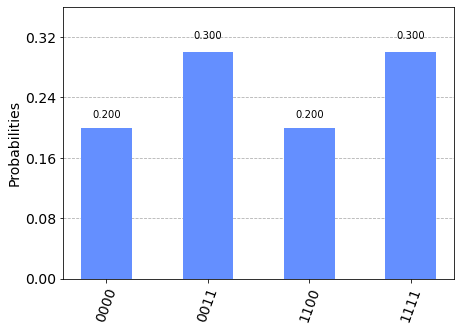

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_qcrn1 = transpile(qcrn1, aer_sim)
qobj1 = assemble(transpiled_qcrn1)
results1 = aer_sim.run(qobj1,shots =10).result()
counts1 = results1.get_counts()
print(counts1)
plot_histogram(counts1)

In [8]:
def functionNm1(A):
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    for i in range(len(A)):
        for j in range(len(A)):
            for s in range(len(A)):
                for m in range(len(A)):
                    for k in range(len(A)):
                        s1.append(A[i][k,m]*A[k][s,j]- A[m][k,j]*A[i][s,k])                                  
                    l1 = sum(s1)
                    s2.append(l1*x[m])
                    l2 = sum(s2)
                s3.append(l2)
    return(s3)
MN = Equations(Selecting(functionNm1(matrices(MA1,MA2,MA3,MA4))))
print(MN)

[x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4, x1 + x2, x3 + x4]


In [9]:
def functionNl1(A):
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    for i in range(len(A)):
        for j in range(len(A)):
            for s in range(len(A)):
                for m in range(len(A)):
                    for k in range(len(A)):
                        s1.append(A[m][k,i]*A[k][s,j]- A[i][k,j]*A[m][s,k])                                  
                    l1 = sum(s1)
                    s2.append(l1*x[m])
                    l2 = sum(s2)
                s3.append(l2)
    return(s3)
LN = Equations(Selecting(functionNl1(matrices(MA1,MA2,MA3,MA4))))
print(LN)

[x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4, x1, x2 + x3 + x4]


In [10]:
qregln = QuantumRegister(6) #------>33
cregln = ClassicalRegister(4)

qcln1 = QuantumCircuit(qregln,cregln)

qcln1.h(range(4))

qcln1.barrier(qregln)

qcln1.cx(qregln[1], qregln[4])
qcln1.cx(qregln[2], qregln[4])
qcln1.cx(qregln[3], qregln[4])
qcln1.barrier(qregln)
qcln1.cx(qregln[0], qregln[5])
qcln1.barrier(qregln)
qcln1.h(range(4))

qcln1.barrier(qregln)

for k in range(4):
    qcln1.measure(qregln[k],cregln[k])

qcln1.draw()

┌───┐ ░                 ░       ░ ┌───┐ ░ ┌─┐         
q22_0: ┤ H ├─░─────────────────░───■───░─┤ H ├─░─┤M├─────────
       ├───┤ ░                 ░   │   ░ ├───┤ ░ └╥┘┌─┐      
q22_1: ┤ H ├─░───■─────────────░───┼───░─┤ H ├─░──╫─┤M├──────
       ├───┤ ░   │             ░   │   ░ ├───┤ ░  ║ └╥┘┌─┐   
q22_2: ┤ H ├─░───┼────■────────░───┼───░─┤ H ├─░──╫──╫─┤M├───
       ├───┤ ░   │    │        ░   │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q22_3: ┤ H ├─░───┼────┼────■───░───┼───░─┤ H ├─░──╫──╫──╫─┤M├
       └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░   │   ░ └───┘ ░  ║  ║  ║ └╥┘
q22_4: ──────░─┤ X ├┤ X ├┤ X ├─░───┼───░───────░──╫──╫──╫──╫─
             ░ └───┘└───┘└───┘ ░ ┌─┴─┐ ░       ░  ║  ║  ║  ║ 
q22_5: ──────░─────────────────░─┤ X ├─░───────░──╫──╫──╫──╫─
             ░                 ░ └───┘ ░       ░  ║  ║  ║  ║ 
 c4: 4/═══════════════════════════════════════════╩══╩══╩══╩═
                                                  0  1  2  3

{'1111': 3, '0000': 3, '1110': 2, '0001': 2}


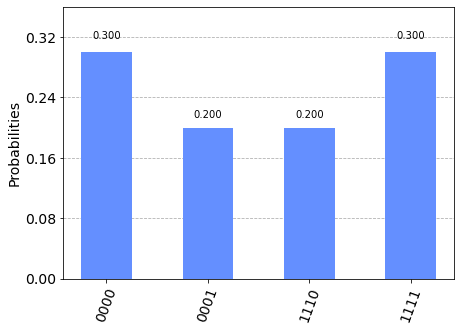

In [12]:
transpiled_qcln1 = transpile(qcln1, aer_sim)
qobjln1 = assemble(transpiled_qcln1)
resultsln1 = aer_sim.run(qobjln1,shots =10).result()
countsln1 = resultsln1.get_counts()
print(countsln1)
plot_histogram(countsln1)

In [35]:
qregn = QuantumRegister(8) 
cregn = ClassicalRegister(4)

qcn = QuantumCircuit(qregn,cregn)

qcn.h(range(4))

###########################################
qcn.barrier(qregn)
###########################################

qcn.cx(qregn[0], qregn[4])
qcn.cx(qregn[1], qregn[4])
#######################################
qcn.barrier(qregn)
###########################################
qcn.cx(qregn[2], qregn[5])
qcn.cx(qregn[3], qregn[5])
###########################################
qcn.barrier(qregn)
###########################################
qcn.cx(qregn[1], qregn[6])
qcn.cx(qregn[2], qregn[6])
qcn.cx(qregn[3], qregn[6])
###########################################
qcn.barrier(qregn)
###########################################
qcn.cx(qregn[0], qregn[7])

qcn.h(range(4))

###########################################
qcn.barrier(qregn)
###########################################

for k in range(4):
    qcn.measure(qregn[k],cregn[k])

qcn.draw()

┌───┐ ░            ░            ░                 ░      ┌───┐ ░ ┌─┐   »
q294_0: ┤ H ├─░───■────────░────────────░─────────────────░───■──┤ H ├─░─┤M├───»
        ├───┤ ░   │        ░            ░                 ░   │  ├───┤ ░ └╥┘┌─┐»
q294_1: ┤ H ├─░───┼────■───░────────────░───■─────────────░───┼──┤ H ├─░──╫─┤M├»
        ├───┤ ░   │    │   ░            ░   │             ░   │  ├───┤ ░  ║ └╥┘»
q294_2: ┤ H ├─░───┼────┼───░───■────────░───┼────■────────░───┼──┤ H ├─░──╫──╫─»
        ├───┤ ░   │    │   ░   │        ░   │    │        ░   │  ├───┤ ░  ║  ║ »
q294_3: ┤ H ├─░───┼────┼───░───┼────■───░───┼────┼────■───░───┼──┤ H ├─░──╫──╫─»
        └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │    │   ░   │  └───┘ ░  ║  ║ »
q294_4: ──────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼────┼───░───┼────────░──╫──╫─»
              ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │    │   ░   │        ░  ║  ║ »
q294_5: ──────░────────────░─┤ X ├┤ X ├─░───┼────┼────┼───░───┼────────░──╫──╫─»
              ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░   │        ░  ║  ║ »
q294_6: ──────░────────────░────────────░─┤ X ├┤ X ├┤ X ├─░───┼────────░──╫──╫─»
              ░            ░            ░ └───┘└───┘└───┘ ░ ┌─┴─┐      ░  ║  ║ »
q294_7: ──────░────────────░────────────░─────────────────░─┤ X ├──────░──╫──╫─»
              ░            ░            ░                 ░ └───┘      ░  ║  ║ »
 c10: 4/══════════════════════════════════════════════════════════════════╩══╩═»
                                                                          0  1 »
«              
«q294_0: ──────
«              
«q294_1: ──────
«        ┌─┐   
«q294_2: ┤M├───
«        └╥┘┌─┐
«q294_3: ─╫─┤M├
«         ║ └╥┘
«q294_4: ─╫──╫─
«         ║  ║ 
«q294_5: ─╫──╫─
«         ║  ║ 
«q294_6: ─╫──╫─
«         ║  ║ 
«q294_7: ─╫──╫─
«         ║  ║ 
« c10: 4/═╩══╩═
«         2  3

{'1100': 7, '0011': 2, '0010': 5, '1110': 4, '1101': 1, '0000': 5, '1111': 3, '0001': 3}


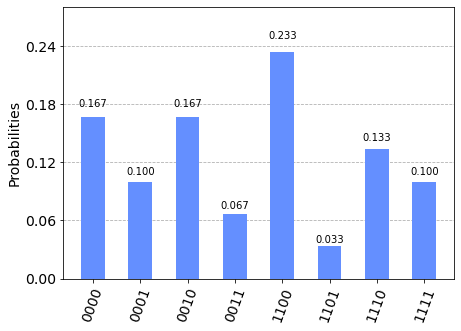

In [36]:
transpiled_qcn = transpile(qcn, aer_sim)
qobjn = assemble(transpiled_qcn)
resultsn = aer_sim.run(qobjn,shots = 30).result()
countsn = resultsn.get_counts()
print(countsn)
plot_histogram(countsn)

In [37]:
from itertools import accumulate
def functionZ(A):
    s1 = []
    s2 = []
    for i in range(len(A)):
        for k in range(len(A)):
            for m in range(len(A)):
                s1.append((A[m][k,i]- A[i][k,m])*x[m])                                
    Input = s1
    split = len(s1) / len(A)
    length_to_split = [] 
    for i in range(int(split)):
          length_to_split.append(len(A))
    Output = [Input[x - y: x] for x, y in zip(accumulate(length_to_split), length_to_split)]
    s4 = []
    for i in range(len(Output)):
        s3 = sum(Output[i])
        s4.append(s3)
    return(s4)
functionZ(matrices(MA1,MA2,MA3,MA4))

[0, 0, 0, 0, 0, -x3, 0, 0, 0, x2, 0, 0, 0, 0, 0, 0]

In [38]:
qregc = QuantumRegister(4)
ancillaryc = QuantumRegister(6)
cregc = ClassicalRegister(4)

qcc = QuantumCircuit(qregc, ancillaryc, cregc)

qcc.h(range(4))

###########################################
qcc.barrier(qregc)
###########################################
qcc.cx(qregc[0],ancillaryc[0])
qcc.cx(qregc[1],ancillaryc[0])
#######################################
qcc.barrier(qregc)
###########################################
qcc.cx(qregc[2],ancillaryc[1])
qcc.cx(qregc[3],ancillaryc[1])
#######################################
qcc.barrier(qregc)

qcc.cx(qregc[1], ancillaryc[2])
qcc.cx(qregc[2], ancillaryc[2])
qcc.cx(qregc[3], ancillaryc[2])
qcc.barrier(qregc)
qcc.cx(qregc[0], ancillaryc[3])
qcc.barrier(qregc)
###########################################
qcc.barrier(qregc)
###########################################
qcc.cx(qregc[2], ancillaryc[4])
qcc.cx(qregc[1], ancillaryc[5])

###########################################
qcc.barrier(qregc)
###########################################
qcc.h(range(4))
###########################################
qcc.barrier(qregc)
###########################################
for k in range(4):
    qcc.measure(qregc[k],cregc[k])
qcc.draw() 

┌───┐ ░            ░            ░                 ░       ░  ░      »
q309_0: ┤ H ├─░───■────────░────────────░─────────────────░───■───░──░──────»
        ├───┤ ░   │        ░            ░                 ░   │   ░  ░      »
q309_1: ┤ H ├─░───┼────■───░────────────░───■─────────────░───┼───░──░──────»
        ├───┤ ░   │    │   ░            ░   │             ░   │   ░  ░      »
q309_2: ┤ H ├─░───┼────┼───░───■────────░───┼────■────────░───┼───░──░───■──»
        ├───┤ ░   │    │   ░   │        ░   │    │        ░   │   ░  ░   │  »
q309_3: ┤ H ├─░───┼────┼───░───┼────■───░───┼────┼────■───░───┼───░──░───┼──»
        └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │    │   ░   │   ░  ░   │  »
q310_0: ────────┤ X ├┤ X ├─────┼────┼───────┼────┼────┼───────┼──────────┼──»
                └───┘└───┘   ┌─┴─┐┌─┴─┐     │    │    │       │          │  »
q310_1: ─────────────────────┤ X ├┤ X ├─────┼────┼────┼───────┼──────────┼──»
                             └───┘└───┘   ┌─┴─┐┌─┴─┐┌─┴─┐     │          │  »
q310_2: ──────────────────────────────────┤ X ├┤ X ├┤ X ├─────┼──────────┼──»
                                          └───┘└───┘└───┘   ┌─┴─┐        │  »
q310_3: ────────────────────────────────────────────────────┤ X ├────────┼──»
                                                            └───┘      ┌─┴─┐»
q310_4: ───────────────────────────────────────────────────────────────┤ X ├»
                                                                       └───┘»
q310_5: ────────────────────────────────────────────────────────────────────»
                                                                            »
 c11: 4/════════════════════════════════════════════════════════════════════»
                                                                            »
«              ░ ┌───┐ ░ ┌─┐         
«q309_0: ──────░─┤ H ├─░─┤M├─────────
«              ░ ├───┤ ░ └╥┘┌─┐      
«q309_1: ──■───░─┤ H ├─░──╫─┤M├──────
«          │   ░ ├───┤ ░  ║ └╥┘┌─┐   
«q309_2: ──┼───░─┤ H ├─░──╫──╫─┤M├───
«          │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐
«q309_3: ──┼───░─┤ H ├─░──╫──╫──╫─┤M├
«          │   ░ └───┘ ░  ║  ║  ║ └╥┘
«q310_0: ──┼──────────────╫──╫──╫──╫─
«          │              ║  ║  ║  ║ 
«q310_1: ──┼──────────────╫──╫──╫──╫─
«          │              ║  ║  ║  ║ 
«q310_2: ──┼──────────────╫──╫──╫──╫─
«          │              ║  ║  ║  ║ 
«q310_3: ──┼──────────────╫──╫──╫──╫─
«          │              ║  ║  ║  ║ 
«q310_4: ──┼──────────────╫──╫──╫──╫─
«        ┌─┴─┐            ║  ║  ║  ║ 
«q310_5: ┤ X ├────────────╫──╫──╫──╫─
«        └───┘            ║  ║  ║  ║ 
« c11: 4/═════════════════╩══╩══╩══╩═
«                         0  1  2  3

{'0000': 4, '0001': 4, '0101': 1, '1111': 2, '0110': 5, '0100': 3, '0010': 2, '0011': 3, '1010': 4, '1110': 3, '1001': 4, '0111': 2, '1101': 3, '1000': 3, '1011': 5, '1100': 2}


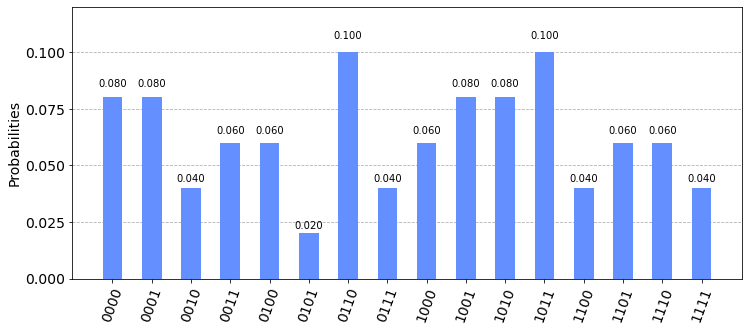

In [39]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_qcc = transpile(qcc, aer_sim)
qobjc1 = assemble(transpiled_qcc)
resultsc1 = aer_sim.run(qobjc1,shots = 50).result()
countsc1 = resultsc1.get_counts()
print(countsc1)
plot_histogram(countsc1, figsize=(12,5))